In [59]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

In [60]:
dataset=pd.read_csv("data_294.csv")

In [61]:
dataset.shape

(294, 17)

In [62]:
x = dataset[['1', '15', '18', '21', '25', '26', '39', '41', '58', '69', '83', '85', '141', '155', '166']]

In [63]:
x.shape

(294, 15)

In [64]:
y = dataset['Act']

In [65]:
x_model, x_extest, y_model, y_extest = train_test_split(x,y,test_size=.2, random_state = 7000, shuffle=True)

In [66]:
x_model.shape

(235, 15)

In [67]:
x_train, x_test2, y_train, y_test2 = train_test_split(x_model,y_model,test_size=.3, random_state = 7000, shuffle=True)

In [68]:
x_train.shape

(164, 15)

In [69]:
x_test2.shape

(71, 15)

In [70]:
x_val, x_test, y_val, y_test = train_test_split(x_test2,y_test2,test_size=.5, random_state = 7000, shuffle=True)

In [71]:
x_test.shape

(36, 15)

In [72]:
x_val.shape

(35, 15)

In [73]:
# scealing is required for indepandent variables at ANN
from sklearn.preprocessing import StandardScaler

In [74]:
scale = StandardScaler()

In [75]:
X = scale.fit_transform(x)
X_train = scale.fit_transform(x_train)
X_test = scale.fit_transform(x_test)
X_val = scale.fit_transform(x_val)
X_model = scale.fit_transform(x_model)
X_extest = scale.fit_transform(x_extest)

In [76]:
  #regressor = tree.DecisionTreeRegressor()
  #regressor = linear_model.Ridge(alpha=.5)
regressor = linear_model.Lasso(alpha=0.5, fit_intercept=True, normalize=False, precompute=False,
    copy_X=True, max_iter=10000, tol=0.0001, warm_start=False, positive=False, random_state=0,
    selection='cyclic',)
  #regressor = ElasticNet(random_state=0)
  #regressor = KernelRidge(alpha=1.0)

In [77]:
 regressor.fit(X_train, y_train)

Lasso(alpha=0.5, max_iter=10000, random_state=0)

In [78]:
# compute the testing accuracy
y_pred = regressor.predict(X_test)

In [79]:
y_pred_train = regressor.predict(X_train)

In [80]:
y_pred_train.shape

(164,)

In [81]:
y_pred_val = regressor.predict(X_val)

In [82]:
y_pred_extest = regressor.predict(X_extest)

In [83]:
y_pred_model = regressor.predict(X_model)

In [84]:
y_pred_all = regressor.predict(X)

In [85]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [86]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [87]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 20.417599838227673
MSE is 802.5591166812432
R2 score is 0.44953029379684084


In [88]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [89]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 24.59799107236598
MSE is 1060.9316566395783
R2 score is 0.5966744885198483


In [90]:
cvscoretrain = (-cross_val_score(regressor,X_train,y_train.ravel(),cv=5).mean())

In [91]:
print("The CV score for training set")
print("--------------------------------------")
print (-cross_val_score(regressor,X_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
[-0.40966663 -0.3412938  -0.48596542 -0.74013089 -0.48781815]
Q2 is -0.49297497806976764


In [92]:
## model evaluation for extest set
maeex = metrics.mean_absolute_error(y_extest, y_pred_extest)
mseex = metrics.mean_squared_error(y_extest, y_pred_extest)
r2ex = metrics.r2_score(y_extest, y_pred_extest)

In [93]:
print("The model performance for extest set")
print("--------------------------------------")
print('MAE is {}'.format(maeex))
print('MSE is {}'.format(mseex))
print('R2 score is {}'.format(r2ex))

The model performance for extest set
--------------------------------------
MAE is 21.30138239379527
MSE is 891.8403686330208
R2 score is 0.6876451481589495


In [39]:
## model evaluation for val set
maevl = metrics.mean_absolute_error(y_val, y_pred_val)
msevl = metrics.mean_squared_error(y_val, y_pred_val)
r2vl = metrics.r2_score(y_val, y_pred_val)

In [40]:
print("The model performance for val set")
print("--------------------------------------")
print('MAE is {}'.format(maevl))
print('MSE is {}'.format(msevl))
print('R2 score is {}'.format(r2vl))

The model performance for val set
--------------------------------------
MAE is 25.42467570735541
MSE is 1145.03345036733
R2 score is 0.6604808211269104


In [41]:
## model evaluation for model set
maemod = metrics.mean_absolute_error(y_model, y_pred_model)
msemod = metrics.mean_squared_error(y_model, y_pred_model)
r2mod = metrics.r2_score(y_model, y_pred_model)

In [42]:
print("The model performance for model set")
print("--------------------------------------")
print('MAE is {}'.format(maemod))
print('MSE is {}'.format(msemod))
print('R2 score is {}'.format(r2mod))

The model performance for model set
--------------------------------------
MAE is 23.68850219618812
MSE is 1006.0881992441548
R2 score is 0.6119285901531966


In [43]:
# cv for modeling set 
cvscoremod = (-cross_val_score(regressor,X_model,y_model.ravel(),cv=5).mean())

In [44]:
print("The CV score for model set")
print("--------------------------------------")
print (-cross_val_score(regressor,X_model,y_model.ravel(),cv=5))
print('Q2 is {}'.format(cvscoremod))

The CV score for model set
--------------------------------------
[-0.71920021 -0.36600022 -0.32345681 -0.41509261 -0.64891326]
Q2 is -0.49453262081123633


In [45]:
regressor1 = linear_model.Lasso(max_iter=10000,random_state = 0)

In [46]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [47]:
# creatting parameter gride
param_grid_regressor= {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3,1.4, 1.5],
                        'selection' : ['cyclic','random']}

In [48]:
regressor_random = RandomizedSearchCV(estimator = regressor1, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [49]:

regressor_random.fit (X_model,y_model)

C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9, 1, 1.1, 1.2,
                                                  1.3, 1.4, 1.5],
                                        'selection': ['cyclic', 'random']},
                   scoring='neg_mean_squared_error', verbose=2)

In [50]:
regressor_random.best_params_

{'selection': 'cyclic', 'alpha': 0.1}

In [51]:
regressor_random.best_score_

-1109.4693920519753

In [52]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [53]:
# creatting parameter gride
param_grid_regressor= {'alpha': [ 0.5,0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3,1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.5, 3, 3.5],
                        'selection' : ['cyclic','random']}

In [54]:
regressor_grid = GridSearchCV(estimator =regressor1, param_grid=param_grid_regressor,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")

regressor_grid.fit (X_model,y_model)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3,
                                   1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.5, 3,
                                   3.5],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [55]:
regressor_grid.best_params_

{'alpha': 0.5, 'selection': 'cyclic'}

In [56]:
regressor_grid.best_score_

-1145.6010777531078

In [94]:
from matplotlib import pyplot as plt 

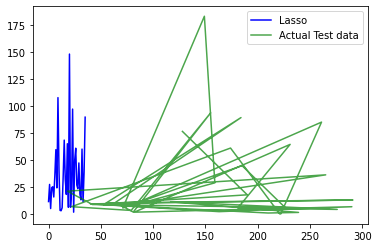

In [463]:
plt.plot(y_pred, label='Lasso', color='b')
plt.plot(y_test, label='Actual Test data', color='g', alpha=.7)
plt.legend()
plt.show()


Text(0.5, 1.0, 'Actual VS Pred Lasso Reg')

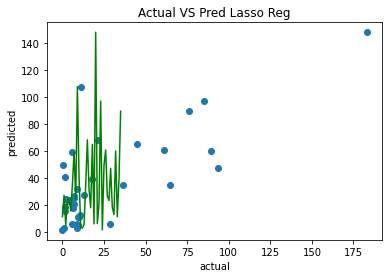

In [58]:
plt.scatter(y_test,y_pred)
plt.plot(y_pred, label='Lasso', color='g')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title ( 'Actual VS Pred Lasso Reg')


In [457]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference'=y_test-y_pred})
pred_y_df

SyntaxError: invalid syntax (<ipython-input-457-cac6c459566e>, line 1)

ValueError: x and y must be the same size

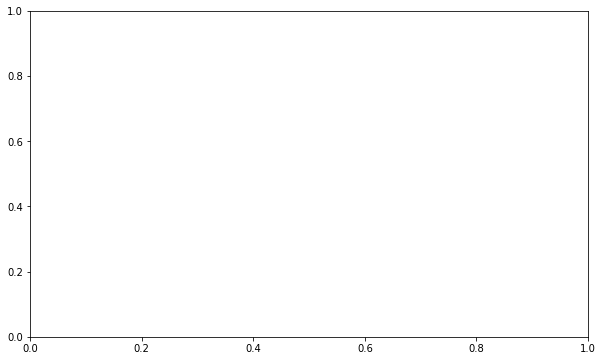

In [95]:
# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.plot(x, y_pred, c='r')
plt.title('Scatter plot and a Lasso')
plt.ylabel("y")
plt.xlabel("bmi")
plt.show()